In [1]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew
from scipy.stats.mstats import gmean,hmean
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from scipy.stats import pearsonr
%matplotlib inline

In [2]:
def calcula_estatisticas(data):
  mean = round(np.mean(data),2)
  mode = round(stats.mode(data,)[0][0],2)
  median = round(np.median(data),2)
  var = round(np.var(data),2)
  std = round(np.std(data),2)
  coef_pearson = round(stats.skew(data),2)
  coef_kurtosis = round(kurtosis(data),2)
  msg = print("Media: {}\nModa: {}\nMediana: {}\nVariância: {}\nDesvio Padrão: {}\nCoeficiente Person: {}\nCoeficiente de Kurtosi: {}".format(mean,median,mode,var,std,coef_pearson,coef_kurtosis))
  return msg

## **Obtenção do dataset**


In [3]:
from sklearn.datasets import load_diabetes
dia = load_diabetes()

In [4]:
dia.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
dir(dia)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [6]:
dia = pd.DataFrame(data= np.c_[dia['data'], dia['target']],
                     columns= dia['feature_names'] + ['Progression'])

dia.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


## **Modificação do dataset**

Modificando o dataset para obter a versão original, usando os parâmetros abaixo: 

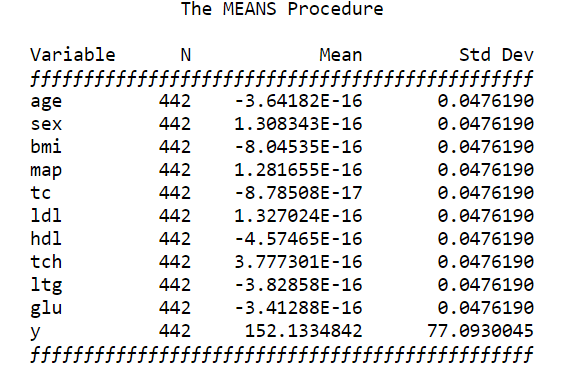

[link da imagem](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.read.tab.out.txt)

Aplicando o inverso das operações feitas:

In [7]:
dia["age"] = round(dia["age"]*13.1090278*sqrt(442)+48.5180995)
dia["sex"] = abs(round(dia["sex"]*1.4683258 *sqrt(442)+0.4995612))
dia["bmi"] = dia["bmi"]*4.4181216*sqrt(442)+26.3757919
dia["bp"] = dia["bp"]*13.8312834*sqrt(442)+94.6470136
dia["s1"] = round(dia["s1"]*34.6080517*sqrt(442)+189.1402715)
dia["s2"] = dia["s2"]*30.4130810*sqrt(442)+115.4391403
dia["s3"] = round(dia["s3"]*12.9342022*sqrt(442)+49.7884615)
dia["s4"] = round(dia["s4"]*1.2904499*sqrt(442)+4.0702489)
dia["s5"] = dia["s5"]*0.5223906*sqrt(442)+ 4.6414109 
dia["s6"] = round(dia["s6"]*11.4963347*sqrt(442)+91.2601810)

In [8]:
dia.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,59.0,2.0,32.106486,101.007190,157.0,93.174800,38.0,4.0,4.860058,87.0,151.0
1,48.0,1.0,21.594588,86.991246,183.0,103.186131,70.0,3.0,3.890970,69.0,75.0
2,72.0,2.0,30.504673,92.998079,156.0,93.575253,41.0,4.0,4.672863,85.0,141.0
3,24.0,1.0,25.298781,83.987829,198.0,131.418086,40.0,5.0,4.890629,89.0,206.0
4,50.0,1.0,22.996175,101.007190,192.0,125.411287,52.0,4.0,4.290061,80.0,135.0


## **Explorando os dados**

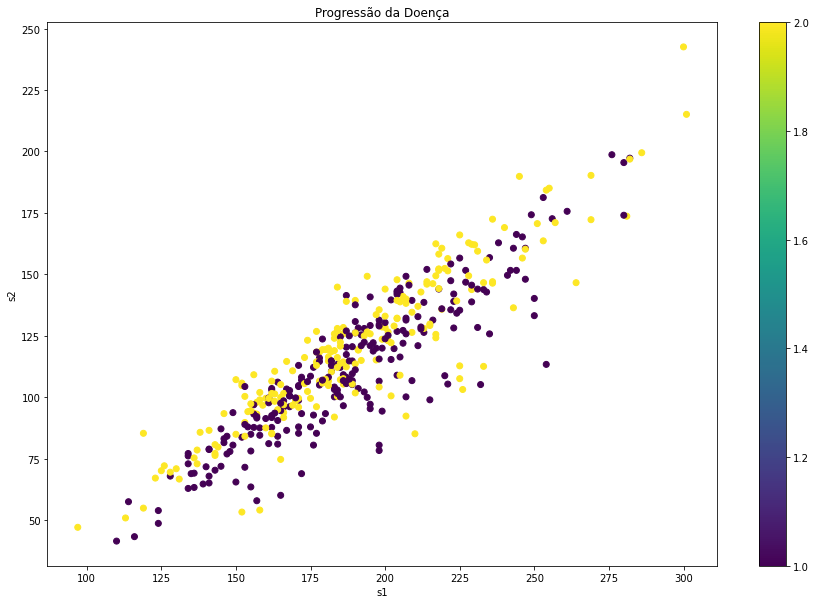

In [9]:
plt.figure(figsize=(15,10))

plt.scatter(dia['s1'],dia['s2'],c=dia['sex'],cmap='viridis')
plt.colorbar()
plt.xlabel('s1')
plt.ylabel('s2')
plt.title('Progressão da Doença')
plt.show()

Há uma alta correlação entre s1 e s2.

In [ ]:
corr, _ = pearsonr(dia["s1"], dia["s2"])
corr

0.8966629578104899

## **Dividindo por faixa de progressão da doença**

In [10]:
p0 = dia.loc[dia["Progression"]<=150]
p1 = dia.loc[(dia["Progression"]>150) & (dia["Progression"]<=250)]
p2 = dia.loc[(dia["Progression"]>250)]

In [11]:
c0 = pd.DataFrame.copy(p0)
c1 = pd.DataFrame.copy(p1)
c2 = pd.DataFrame.copy(p2)

In [12]:
c0.loc[:,"Progression"] = "c0"
c1.loc[:,"Progression"] = "c1"
c2.loc[:,"Progression"] = "c2"

In [13]:
new = pd.concat([c0,c1,c2])

In [14]:
new

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
1,48.0,1.0,21.594588,86.991246,183.0,103.186131,70.0,3.0,3.890970,69.0,c0
2,72.0,2.0,30.504673,92.998079,156.0,93.575253,41.0,4.0,4.672863,85.0,c0
4,50.0,1.0,22.996175,101.007190,192.0,125.411287,52.0,4.0,4.290061,80.0,c0
5,23.0,1.0,22.595721,88.993523,139.0,64.742618,61.0,2.0,4.189142,68.0,c0
6,36.0,2.0,21.995042,89.994662,160.0,99.582052,50.0,3.0,3.950461,82.0,c0
...,...,...,...,...,...,...,...,...,...,...,...
404,44.0,1.0,31.405693,115.023134,165.0,97.579786,52.0,3.0,4.343467,89.0,c2
405,62.0,2.0,37.812945,119.027690,113.0,50.926981,31.0,4.0,5.043878,84.0,c2
412,69.0,1.0,34.308979,113.020857,200.0,123.809474,54.0,4.0,4.709606,112.0,c2
416,41.0,1.0,33.808413,123.365958,187.0,127.013100,45.0,4.0,4.317120,100.0,c2


## **Estatísticas por faixa de progressão**



*   Faixa c0: Progression < 150
*   Faixa c1: 150 < Progression <= 250
*   Faixa c2: Progression > 250


*   Faixa c0



In [15]:
c0.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,46.669421,1.458678,24.564892,89.808500,183.516529,111.684593,53.595041,3.669421,4.406252,87.979339
std,13.182025,0.499322,3.564733,11.827436,33.357515,30.025235,13.524576,1.162259,0.442244,10.468466
min,19.000000,1.000000,17.990509,61.962774,110.000000,41.516330,23.000000,2.000000,3.256530,58.000000
25%,37.000000,1.000000,22.095155,82.486121,161.250000,93.575253,44.250000,3.000000,4.097861,81.000000
50%,48.000000,1.000000,24.097421,87.992385,182.000000,107.491004,53.000000,3.000000,4.375435,88.500000
75%,56.000000,2.000000,26.575226,97.002634,203.000000,126.362364,62.000000,4.000000,4.661090,95.000000
max,74.000000,2.000000,35.009773,125.034523,300.000000,242.543865,98.000000,9.000000,6.095211,117.000000


In [16]:
calcula_estatisticas(c0["bmi"])

Media: 24.56
Moda: 24.1
Mediana: 22.1
Variância: 12.65
Desvio Padrão: 3.56
Coeficiente Person: 0.62
Coeficiente de Kurtosi: 0.03


In [17]:
calcula_estatisticas(c0["bp"])

Media: 89.81
Moda: 87.99
Mediana: 86.99
Variância: 139.31
Desvio Padrão: 11.8
Coeficiente Person: 0.42
Coeficiente de Kurtosi: 0.06


In [18]:
calcula_estatisticas(c0["s2"])

Media: 111.68
Moda: 107.49
Mediana: 114.8
Variância: 897.79
Desvio Padrão: 29.96
Coeficiente Person: 0.63
Coeficiente de Kurtosi: 1.18


In [19]:
calcula_estatisticas(c0["s3"])

Media: 53.6
Moda: 53.0
Mediana: 46.0
Variância: 182.16
Desvio Padrão: 13.5
Coeficiente Person: 0.54
Coeficiente de Kurtosi: 0.43


In [20]:
calcula_estatisticas(c0["s4"])

Media: 3.67
Moda: 3.0
Mediana: 3.0
Variância: 1.35
Desvio Padrão: 1.16
Coeficiente Person: 1.0
Coeficiente de Kurtosi: 1.44


*   Faixa c1

In [21]:
c1.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,50.214815,1.481481,27.358891,97.983998,196.933333,121.031515,46.311111,4.481481,4.870415,92.970370
std,13.558268,0.501518,3.913097,13.341279,35.880648,30.975797,10.781733,1.297827,0.499895,10.627296
min,19.000000,1.000000,19.892662,70.973024,97.000000,43.318369,25.000000,2.000000,3.495210,69.000000
25%,40.000000,1.000000,24.597988,88.492954,175.000000,99.281712,38.500000,3.500000,4.527063,86.500000
50%,52.000000,1.000000,27.200934,98.003773,199.000000,125.010834,46.000000,4.000000,4.860058,93.000000
75%,61.000000,2.000000,30.004107,109.016301,220.000000,142.230324,52.000000,5.000000,5.168034,98.500000
max,79.000000,2.000000,42.217931,133.043634,301.000000,215.112817,99.000000,8.000000,6.108680,124.000000


In [22]:
calcula_estatisticas(c1["bmi"])

Media: 27.36
Moda: 27.2
Mediana: 25.3
Variância: 15.2
Desvio Padrão: 3.9
Coeficiente Person: 0.61
Coeficiente de Kurtosi: 0.89


In [23]:
calcula_estatisticas(c1["bp"])

Media: 97.98
Moda: 98.0
Mediana: 109.02
Variância: 176.67
Desvio Padrão: 13.29
Coeficiente Person: 0.08
Coeficiente de Kurtosi: -0.52


In [24]:
calcula_estatisticas(c1["s2"])

Media: 121.03
Moda: 125.01
Mediana: 85.17
Variância: 952.39
Desvio Padrão: 30.86
Coeficiente Person: 0.11
Coeficiente de Kurtosi: 0.1


In [25]:
calcula_estatisticas(c1["s3"])

Media: 46.31
Moda: 46.0
Mediana: 38.0
Variância: 115.38
Desvio Padrão: 10.74
Coeficiente Person: 1.19
Coeficiente de Kurtosi: 3.34


In [26]:
calcula_estatisticas(c1["s4"])

Media: 4.48
Moda: 4.0
Mediana: 4.0
Variância: 1.67
Desvio Padrão: 1.29
Coeficiente Person: 0.53
Coeficiente de Kurtosi: -0.09


*   Faixa c2

In [27]:
c2.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,51.876923,1.476923,31.076089,105.730512,193.892308,117.802675,42.830769,4.753846,5.041303,99.923077
std,10.698288,0.503354,4.245078,13.601008,33.117274,29.313954,9.551782,1.225137,0.377924,11.767683
min,23.000000,1.000000,20.993908,77.980996,113.000000,50.926981,22.000000,2.000000,4.317120,71.000000
25%,44.000000,1.000000,28.101954,93.999218,171.000000,98.380692,37.000000,4.000000,4.804203,90.000000
50%,53.000000,1.000000,31.605920,110.017440,187.000000,112.396556,42.000000,5.000000,5.011051,100.000000
75%,58.000000,2.000000,34.308979,115.023134,214.000000,131.418086,47.000000,5.000000,5.294041,109.000000
max,79.000000,2.000000,41.316911,131.041356,282.000000,197.292647,67.000000,8.000000,6.070039,124.000000


In [28]:
calcula_estatisticas(c2["bmi"])

Media: 31.08
Moda: 31.61
Mediana: 31.61
Variância: 17.74
Desvio Padrão: 4.21
Coeficiente Person: -0.01
Coeficiente de Kurtosi: -0.47


In [29]:
calcula_estatisticas(c2["bp"])

Media: 105.73
Moda: 110.02
Mediana: 113.02
Variância: 182.14
Desvio Padrão: 13.5
Coeficiente Person: -0.39
Coeficiente de Kurtosi: -0.97


In [30]:
calcula_estatisticas(c2["s2"])

Media: 117.8
Moda: 112.4
Mediana: 87.97
Variância: 846.09
Desvio Padrão: 29.09
Coeficiente Person: 0.48
Coeficiente de Kurtosi: 0.4


In [31]:
calcula_estatisticas(c2["s3"])

Media: 42.83
Moda: 42.0
Mediana: 37.0
Variância: 89.83
Desvio Padrão: 9.48
Coeficiente Person: 0.65
Coeficiente de Kurtosi: 0.4


In [32]:
calcula_estatisticas(c2["s4"])

Media: 4.75
Moda: 5.0
Mediana: 4.0
Variância: 1.48
Desvio Padrão: 1.22
Coeficiente Person: 0.58
Coeficiente de Kurtosi: 0.29


## **Visualizando**

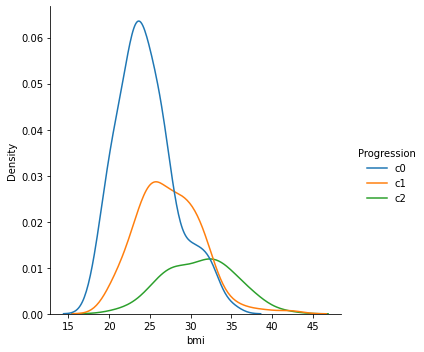

In [33]:
sns.displot(data=new, x="bmi", hue="Progression", kind="kde")

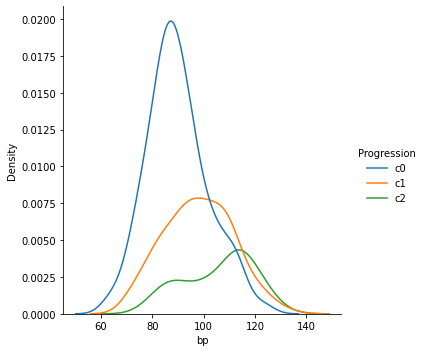

In [34]:
sns.displot(data=new, x="bp", hue="Progression", kind="kde")

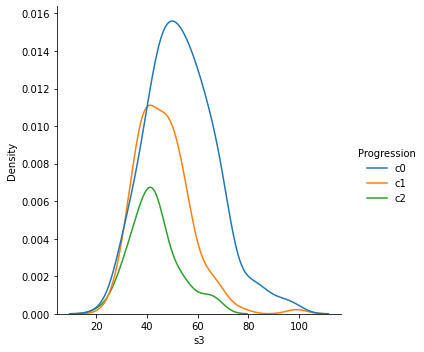

In [35]:
sns.displot(data=new, x="s3", hue="Progression", kind="kde")

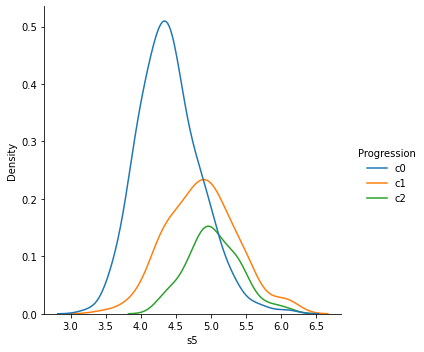

In [36]:
sns.displot(data=new, x="s5", hue="Progression", kind="kde")

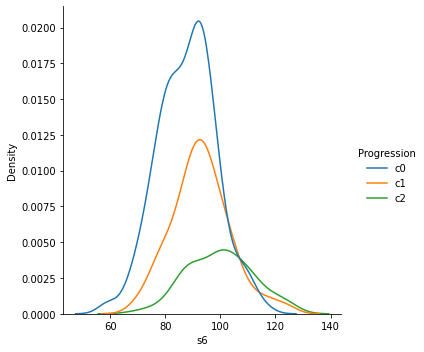

In [37]:
sns.displot(data=new, x="s6", hue="Progression", kind="kde")

## **Mais Análises**

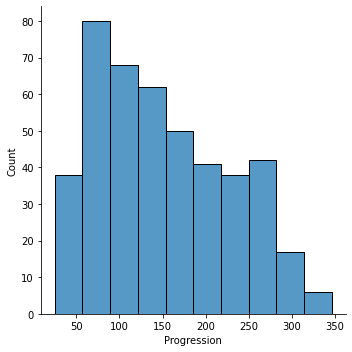

In [38]:
sns.displot(dia["Progression"])

In [39]:
dia["Progression"].describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: Progression, dtype: float64

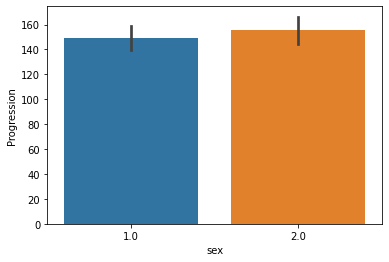

In [40]:
 sns.barplot(x="sex", y="Progression", data=dia)
 # como a progressão da doença se mostra sobre os sexos

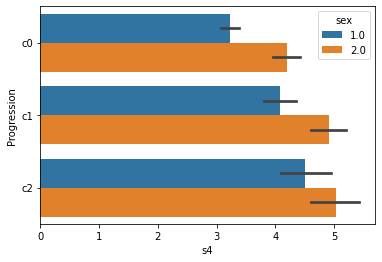

In [41]:
sns.barplot(x="s4", y="Progression", data=new, hue="sex")
# como a progressão da doença se mostra de acordo com os atributos sexo e s4

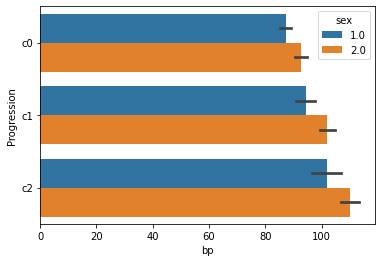

In [42]:
 sns.barplot(x="bp", y="Progression", data=new, hue="sex")
# como a progressão da doença se mostra de acordo com os atributos sexo e bp

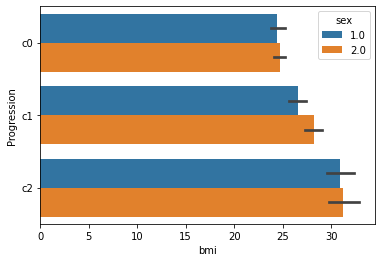

In [43]:
 sns.barplot(x="bmi", y="Progression", data=new, hue="sex")
 # como a progressão da doença se mostra de acordo com os atributos sexo e bmi

*   O dataset trabalhado é interessante para modelos de regressão.
*   Analisou-se o comportamento dos atributos para cada faixa de progressão, isso auxilia na percepção de características que possam viabilizar a tarefa de regressão.